In [2]:
!pip install spacy
!pip install wordcloud

In [40]:
!pip install matplotlib

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud

In [62]:
tweet=pd.read_csv("Elon_musk.csv",error_bad_lines=False)

In [63]:
tweet=[Text.strip() for Text in tweet.Text]  # for removing the leading and trailing characters
tweet=[Text for Text in tweet if Text] # removes the empty string, because they are considered in python as false.
tweet[0:1999]

# after using this command we are able to see that we dont have any leading pr trailing characters here afetr applying this method.

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It�s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [4]:
# joining the each review by saperating them by only a space betwenn them.

Tweet=' '.join(tweet)
Tweet

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [9]:
# Removing Puchuation marks

no_punc_Tweet= Tweet.translate(str.maketrans('','',string.punctuation))#with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_Tweet

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [10]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ranjan
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#Tokenization
from nltk.tokenize import word_tokenize
Tweet_tokens = word_tokenize(no_punc_Tweet)
print(Tweet_tokens)

['kunalb11', 'I�m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It�s', '

In [12]:
len(Tweet_tokens)

21122

In [19]:
nltk.download('stopwords')

my_stop_words = stopwords.words('english') # list of words
my_stop_words.append('the') # want to add some words to the list
no_stop_tokens = [word for word in Tweet_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I�m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It�s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 

[nltk_data] Downloading package stopwords to C:\Users\Ranjan
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
len(no_stop_tokens)

15882

In [16]:
lower_words=[Text.lower()for Text in no_stop_tokens]
print(lower_words)

['kunalb11', 'i�m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it�s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 

In [17]:
# stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i�m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'httpstco3rwe9uhst', 'geoffkeighley', 'unrealengin', 'it�', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 

In [18]:
# NLP english language model of spacy library
spacy.cli.download("en")
nlp = spacy.load("en_core_web_sm")

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
doc=nlp(' '.join(no_stop_tokens))
print(doc)

kunalb11 I�m alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha httpstcoFc9uhQSd7O freewalletorg Any crypto wallet won�t give private keys avoided costs freewalletorg Your app sucks RT SpaceX NASA selected Falcon Heavy launch first two elements lunar Gateway togeth

In [21]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'I', '�', 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'Spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'just', 'send', 'just', 'agree', 'Clubhouse', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'it', '�', 's', 'get', 'real', 'Bought', 'Dogecoin', 'lil', 'x', 'toddler', 'hodler', 'JoshManMode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 

In [22]:
len(lemmas)

17061

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)
X

<17061x4975 sparse matrix of type '<class 'numpy.int64'>'
	with 15518 stored elements in Compressed Sparse Row format>

In [24]:
print(vectorizer.vocabulary_)

{'kunalb11': 2703, 'alien': 233, 'idaacarmack': 2443, 'ray': 3622, 'trace': 4503, 'cyberpunk': 965, 'hdr': 1682, 'nextlevel': 3154, 'have': 1676, 'try': 4540, 'joerogan': 2623, 'spotify': 4120, 'great': 1617, 'interview': 2552, 'gtera27': 1635, 'doge': 1119, 'underestimate': 4671, 'teslacn': 4347, 'congratulations': 861, 'tesla': 4341, 'china': 744, 'amazing': 259, 'execution': 1331, 'last': 2722, 'year': 4942, 'now': 3194, 'next': 3153, 'even': 1302, 'happy': 1663, 'new': 3150, 'ox': 3314, 'httpstco9wfkmyu2oj': 1870, 'frodo': 1501, 'underdoge': 4670, 'all': 236, 'thought': 4427, 'would': 4917, 'fail': 1367, 'himself': 1726, 'httpstcozgxjfdzzrm': 2403, 'owensparks': 3311, 'flcnhvy': 1444, 'anonyx10': 288, 'haha': 1649, 'thanks': 4386, 'indeed': 2492, 'tweet': 4560, 'definitely': 1020, 'represent': 3706, 'realworld': 3647, 'time': 4445, 'allocation': 238, 'the': 4393, 'entertaining': 1257, 'outcome': 3291, 'likely': 2783, 'givedirectly': 1586, 'just': 2651, 'send': 3893, 'agree': 202, '

In [25]:
print(vectorizer.get_feature_names()[50:100])

['23', '230', '24', '240am', '247teslanew', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewe', '4680', '479000', '48', '4d', '4th']


In [26]:
#print in array format
print(X.toarray().shape)

(17061, 4975)


In [27]:
#Plotting of word cloud

%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# We have to define a function for plotting word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

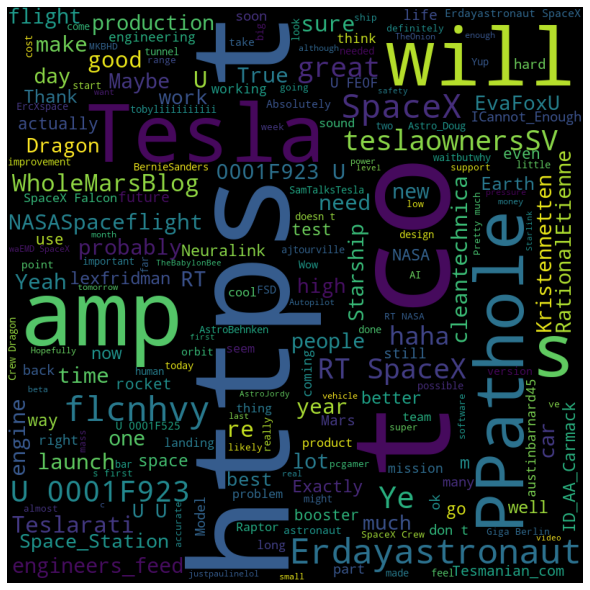

In [28]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(Tweet)
plot_cloud(wordcloud)

#bigrams and trigrams can be included here

In [29]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)# for 100 features

bow_matrix_ngram =vectorizer_ngram_range.fit_transform(tweet)

In [30]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


#TFidf vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_ngram_max_f=TfidfVectorizer(norm='l2' , analyzer= 'word' , ngram_range=(1,3) , max_features=500)
tfidf_ngram_matrix_max_feature=vectorizer_ngram_max_f.fit_transform(lemmas)

In [32]:
print(vectorizer_ngram_max_f.get_feature_names())
print(tfidf_ngram_matrix_max_feature.toarray())

['10', '100', '13', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'benmezrich', 'berlin', 'berniesanders', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'day', 'definitely', 'design', 'detail', 'didn', 'difference', 'differe

In [64]:
#loading english language dictionary
nlp=spacy.load("en_core_web_sm")

one_block= tweet[1000] # applying on 1st 1000 reviews
doc_block=nlp(one_block)  # Applying english language library on 1st 100 tweets



In [65]:
#Applying NAme entity recognizer on the doc_block where we store those values where we apply english language on the 100 reviews

spacy.displacy.render(doc_block, style='ent' , jupyter=True)

In [47]:
# Part of speech tagging

# tagging for 1st 500 reviews
for token in doc_block[0:500]:
    print(token, token.pos_)

@shortword PUNCT
@jwangARK NOUN
The DET
SoC NOUN
� PROPN
s PART
sync NOUN
with ADP
each DET
other ADJ
20 NUM
to PART
30 NUM
times NOUN
/ SYM
sec PROPN
, PUNCT
exchanging VERB
output NOUN
of ADP
NNs NOUN
that DET
should AUX
be VERB
in ADP
� PROPN
https://t.co/9cBJMEaaVW NUM


In [50]:
# filtering only for noun and the verb

noun_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verb[0:500])

['@jwangARK', 'SoC', 'sync', 'times', 'exchanging', 'output', 'NNs', 'be']


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(noun_verb)

# count there occurences

sum_words=X.sum(axis=0)

#for word idx in cv.vocabulary_item for a particular word, word to be dsiplayed after the summation of that word to be
#displayed or no. of occurences of that word to be displayed in cv we store vocabulary_.items()

word_freq=[(word , sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]


#Finally we are going to sort these word_freq into descending order.
# we cannot use sort function on the text data so we use a keyword named as "key", key=lambda x:x[1] which means we have to count
# the 2nd position(0,1) column which stores the value of count so we mentioned x[1] and we use reverse=True for sorting done in
# descending order.

word_freq=sorted(word_freq, key=lambda x: x[1], reverse=True)

#convert word frequency into dataframe

wf_df=pd.DataFrame(word_freq)

# column name given to that dataframe

wf_df.columns=['word','count']

wf_df[0:500]

,word,count
0,jwangark,1
1,soc,1
2,sync,1
3,times,1
4,exchanging,1
5,output,1
6,nns,1
7,be,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

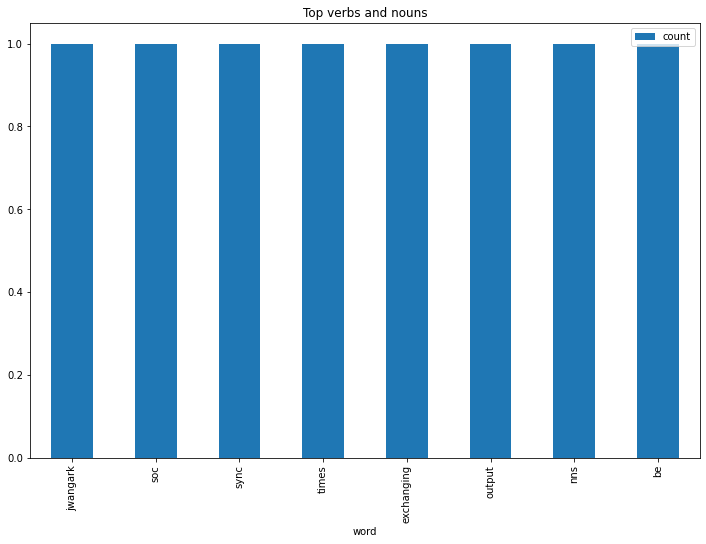

In [61]:
# visulization part of the dataset

wf_df[0:500].plot.bar(x ='word', figsize=(12,8), title='Top verbs and nouns')

#Emotion mining

In [67]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [82]:
data=pd.read_csv("Elon_musk.csv",error_bad_lines=False)

In [83]:
data

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [84]:
data=[Text.strip() for Text in data.Text]
data=[Text for Text in data if Text]

In [85]:
from nltk import tokenize

sentence=tokenize.sent_tokenize(" ".join(data))
sentence[0:100]

['@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [86]:
sent_df=pd.DataFrame(sentence, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [88]:
nlp=spacy.load('en_core_web_sm')

In [99]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [101]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

the                 403
to                  390
is                  347
a                   324
of                  301
&amp;               216
in                  203
for                 177
be                  154
@Erdayastronaut     140
@SpaceX             138
will                136
RT                  127
on                  124
@PPathole           123
@flcnhvy            114
I                   114
but                 109
that                104
with                 99
are                  95
it                   89
at                   85
Tesla                85
The                  79
we                   77
and                  72
this                 72
@SpaceX:             71
from                 70
have                 69
was                  68
@WholeMarsBlog       68
�                    64
@Tesla               64
as                   63
@teslaownersSV       62
This                 60
We                   58
you                  58
@Teslarati           56
has             

In [102]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Ranjan
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ranjan
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [104]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [105]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [106]:
sent_df

,sentence,sentence1,clean
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!,Now next even more!!
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ...","@kenyanwalstreet Not actually payout, vesting ..."
910,"It may never pay out, as the stock can�t b� ht...","It may never pay out, stock can�t b� https://t...","It may never pay out, stock can�t b� https://t..."
911,Details Aug 28.,Details Aug 28.,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [107]:
sent_df=sent_df.drop('sentence',axis=1)

In [108]:
sent_df=sent_df.drop('sentence1',axis=1)

In [109]:
sent_df

,clean
0,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...
1,Have tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge underestimated @teslacn Congratu...
4,Now next even more!!
...,...
909,"@kenyanwalstreet Not actually payout, vesting ..."
910,"It may never pay out, stock can�t b� https://t..."
911,Details Aug 28.
912,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [110]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [111]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [112]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        clean = nlp(Text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [113]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [114]:
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
909    0
910   -4
911    0
912   -2
913    0
Name: sentiment_value, Length: 914, dtype: int64

In [115]:
#word count for "clean"column
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1     3
2     4
3    11
4     4
5     4
6     9
7    10
8     6
9    74
Name: word_count, dtype: int64

In [116]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,41
64,"Also, road hell mostly paved bad intentions.",-7,7
473,"He plays �poor inventor� card, rich along &amp...",-5,25
910,"It may never pay out, stock can�t b� https://t...",-4,21
672,"Occasional flights land ok, frequent (daily) f...",-4,27
604,"Then static fire, checkouts, static fire, fly ...",-4,11
828,Cool Model 3 review @iamjamiefoxx https://t.co...,-3,45
877,This primarily electrical/electronic (chip des...,-3,60
23,https://t.co/UEEocOfcTb The people spoken � ht...,-3,31
474,Pretty odd� https://t.co/PPSorKWdI8 @enn_nafnl...,-3,56


In [117]:
sent_df['sentiment_value'].describe() #max sentiment value=16 and min sentiment value=-8

count    914.000000
mean       1.432166
std        2.680973
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [118]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count
0,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...,0,9
1,Have tried it?,0,3
4,Now next even more!!,0,4
5,Happy New Year Ox!,0,4
6,"https://t.co/9WFKMYu2oj Frodo underdoge, All t...",-2,9
...,...,...,...
909,"@kenyanwalstreet Not actually payout, vesting ...",0,7
910,"It may never pay out, stock can�t b� https://t...",-4,21
911,Details Aug 28.,0,3
912,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,30


In [119]:
#sentiment value greater than 0
sent_df[sent_df['sentiment_value']>0]

,clean,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The entertaining outcome likely @GiveDirectly ...,7,74
17,Back work I go � @CapybaraSurfer @MattWallace8...,4,29
...,...,...,...
901,He one best.,3,3
903,"@Ali_Afshari In general, need improve podcasts...",4,72
905,"@burakaydik True Wow, IHOP &amp; GitHub close ...",7,12
907,This great &amp; terrifying.,3,4


In [120]:
sent_df['index']=range(0,len(sent_df))

In [121]:
sent_df

,clean,sentiment_value,word_count,index
0,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...,0,9,0
1,Have tried it?,0,3,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3
4,Now next even more!!,0,4,4
...,...,...,...,...
909,"@kenyanwalstreet Not actually payout, vesting ...",0,7,909
910,"It may never pay out, stock can�t b� https://t...",-4,21,910
911,Details Aug 28.,0,3,911
912,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,30,912


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

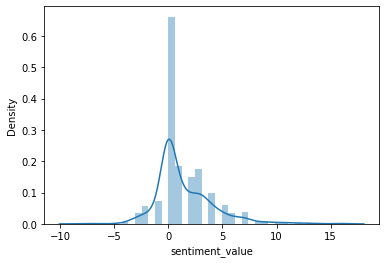

In [122]:
#densityplot based on sentiment value
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

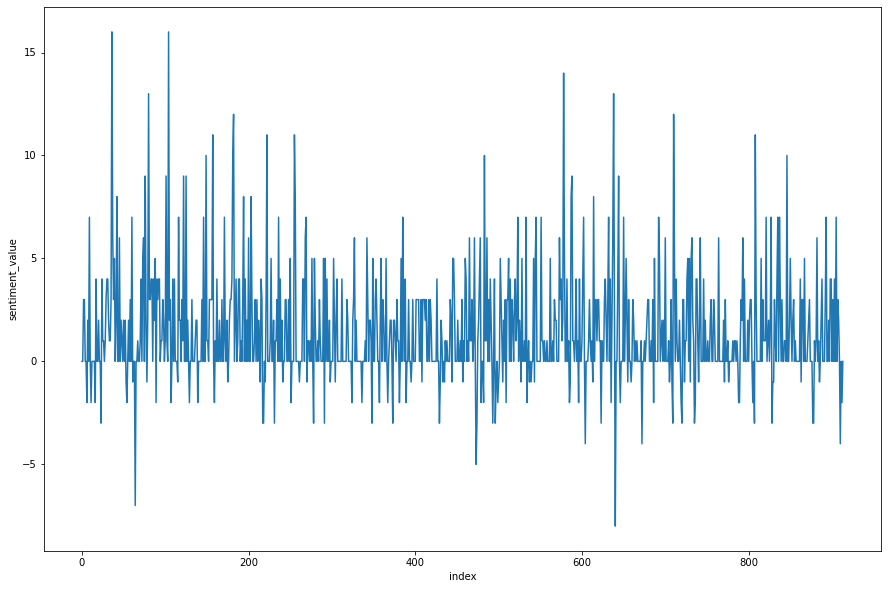

In [123]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

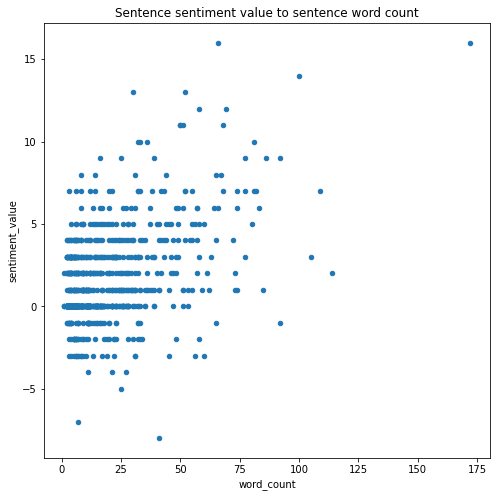

In [124]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

#Q2